In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def read_index_series(file_name):  
    df = pd.read_csv(file_name, sep='\t')
    df.index = df.datetime
    df.drop('datetime', axis=1, inplace=True)
    df = df.iloc[:,:4]
    df.columns = ['Agency', 'Site_number', 'Time_zone', 'Stream_flow']
    return df.iloc[:,:4]

Malott = read_index_series('../data/12447200_Okanogan_at_Malott.txt')
Malott

,Agency,Site_number,Time_zone,Stream_flow
datetime,,,,
2020-03-01 00:00,USGS,12447200,PST,2050
2020-03-01 00:15,USGS,12447200,PST,2050
2020-03-01 00:30,USGS,12447200,PST,2050
2020-03-01 00:45,USGS,12447200,PST,2050
2020-03-01 01:00,USGS,12447200,PST,2050
...,...,...,...,...
2020-08-31 22:45,USGS,12447200,PDT,1350
2020-08-31 23:00,USGS,12447200,PDT,1350
2020-08-31 23:15,USGS,12447200,PDT,1350


In [3]:
CleElm = read_index_series('../data/12479500_Yakima_At_CleElm.txt')
CleElm

,Agency,Site_number,Time_zone,Stream_flow
datetime,,,,
2020-03-01 00:00,USGS,12484500,PST,1620
2020-03-01 00:15,USGS,12484500,PST,1620
2020-03-01 00:30,USGS,12484500,PST,1620
2020-03-01 00:45,USGS,12484500,PST,1620
2020-03-01 01:00,USGS,12484500,PST,1620
...,...,...,...,...
2020-08-31 22:45,USGS,12484500,PDT,3140
2020-08-31 23:00,USGS,12484500,PDT,3140
2020-08-31 23:15,USGS,12484500,PDT,3140


In [4]:
stream_flow = Malott.append(CleElm).sort_index()
stream_flow

,Agency,Site_number,Time_zone,Stream_flow
datetime,,,,
2020-03-01 00:00,USGS,12447200,PST,2050
2020-03-01 00:00,USGS,12484500,PST,1620
2020-03-01 00:15,USGS,12484500,PST,1620
2020-03-01 00:15,USGS,12447200,PST,2050
2020-03-01 00:30,USGS,12447200,PST,2050
...,...,...,...,...
2020-08-31 23:15,USGS,12447200,PDT,1350
2020-08-31 23:30,USGS,12484500,PDT,3140
2020-08-31 23:30,USGS,12447200,PDT,1350


In [5]:
def query_stream(df, Columns=None, site_numbers=None, start_time=None, end_time=None):    
    ## First set values for arguments set to Null  
    if Columns==None: Columns = df.columns
    if start_time==None: start_time = df.index[0]
    if end_time==None: end_time = df.index[df.shape[0]-1]
    if site_numbers==None: site_numbers = df.Site_number.unique()
    ## Return the results of the query   
    df = df.loc[start_time:end_time,:]
    df = df.loc[df.Site_number.isin(site_numbers), Columns]
    return df

query_stream(stream_flow)

,Agency,Site_number,Time_zone,Stream_flow
datetime,,,,
2020-03-01 00:00,USGS,12447200,PST,2050
2020-03-01 00:00,USGS,12484500,PST,1620
2020-03-01 00:15,USGS,12484500,PST,1620
2020-03-01 00:15,USGS,12447200,PST,2050
2020-03-01 00:30,USGS,12447200,PST,2050
...,...,...,...,...
2020-08-31 23:15,USGS,12447200,PDT,1350
2020-08-31 23:30,USGS,12484500,PDT,3140
2020-08-31 23:30,USGS,12447200,PDT,1350


In [42]:
len(query_stream(stream_flow, Columns='Stream_flow', site_numbers=[12484500]))

17660

In [7]:
def plot_time_series(df, ax=None):  
    if ax==None: fig, ax = plt.subplots(figsize=(20, 6))
    df.plot(ax=ax);
    ax.set_xlabel('Date');
    plt.show()
    return ax    

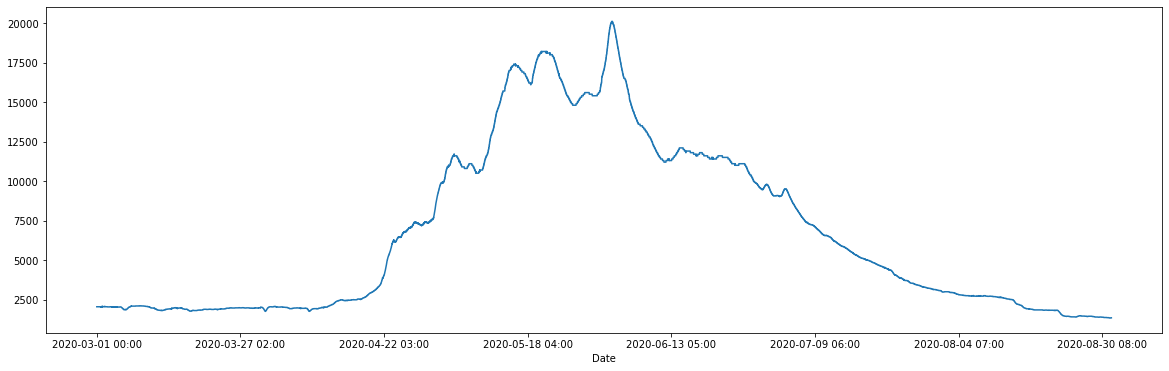

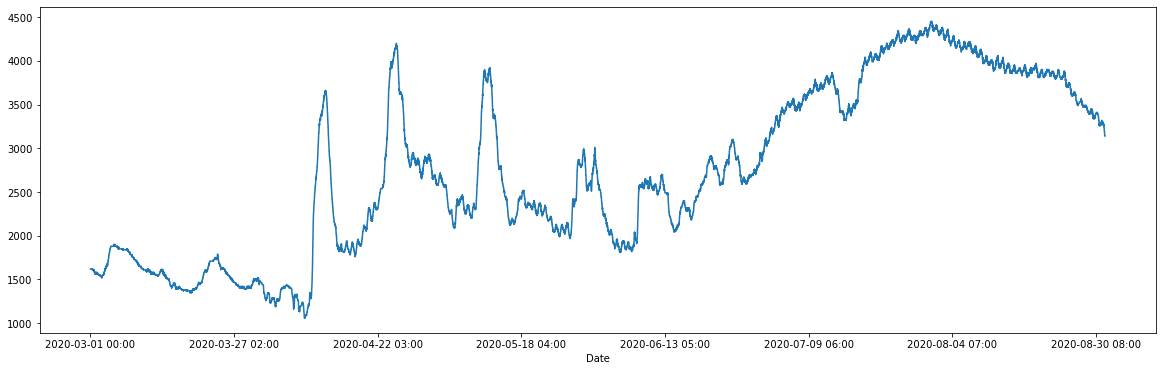

In [15]:
_=plot_time_series(query_stream(stream_flow, Columns='Stream_flow', site_numbers=[12447200])) 
_=plot_time_series(query_stream(stream_flow, Columns='Stream_flow', site_numbers=[12484500]))    

Apply a moving window filter. 

In [33]:
def window_average(ts, length=12, step=6):
    half_length = int(length/2)
    in_index = ts.index
    idx = []
    out = []
    for ix_end in range(length, len(ts), step):
        ix_start = ix_end - length  
        ix_mid = ix_end - half_length
        out.append(ts[ix_start:ix_end].mean())
        idx.append(in_index[ix_mid])
    out = pd.Series(out, index=idx)    
    return out        

In [37]:
filtered_12 = window_average(query_stream(stream_flow, Columns='Stream_flow', site_numbers=[12447200]))
len(filtered_12)

2942

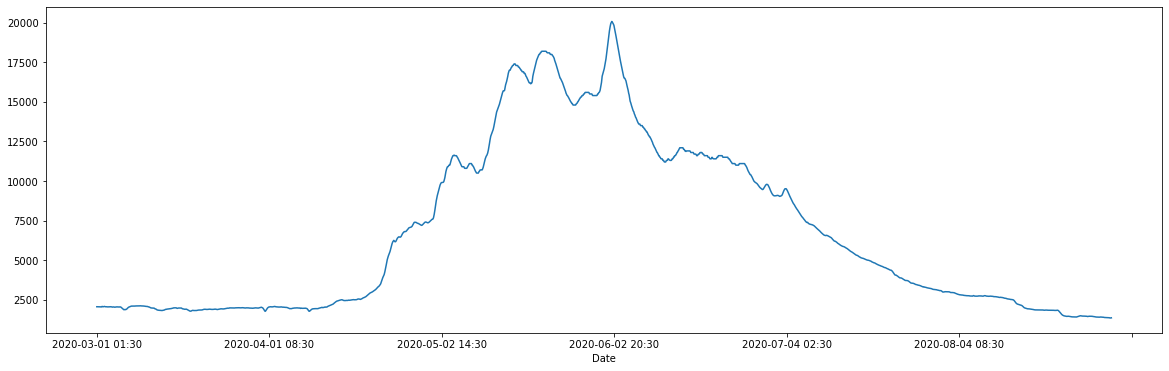

<AxesSubplot:xlabel='Date'>

In [38]:
plot_time_series(filtered_12)

274


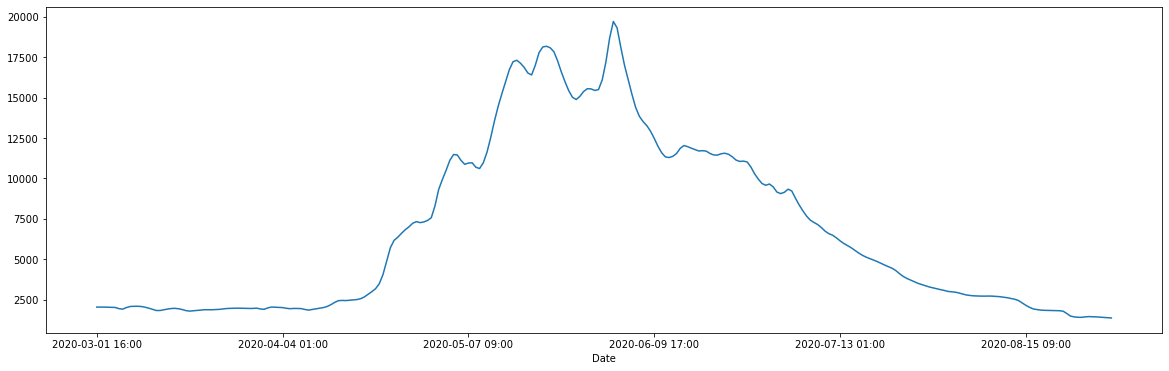

<AxesSubplot:xlabel='Date'>

In [43]:
filtered_128 = window_average(query_stream(stream_flow, Columns='Stream_flow', site_numbers=[12447200]), length=128, step=64)
print(len(filtered_128))
plot_time_series(filtered_128)

274


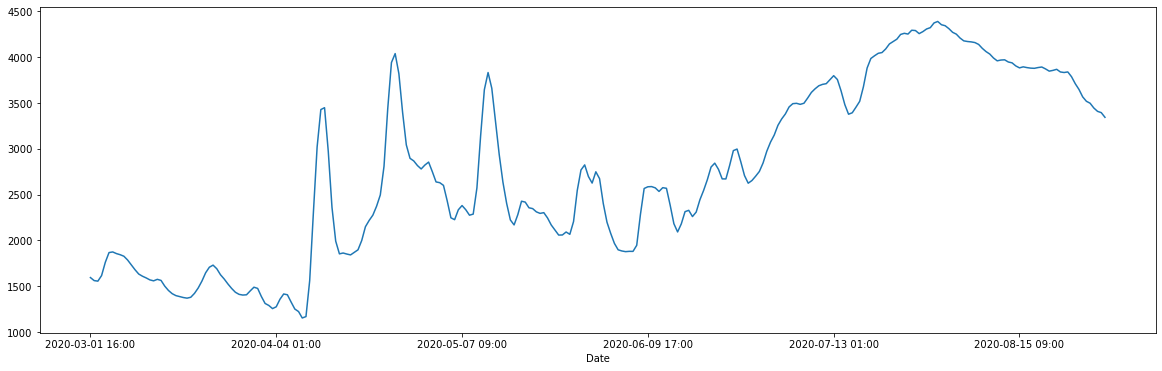

<AxesSubplot:xlabel='Date'>

In [44]:
filtered_128 = window_average(query_stream(stream_flow, Columns='Stream_flow', site_numbers=[12484500]), length=128, step=64)
print(len(filtered_128))
plot_time_series(filtered_128)

Exponential decay filter.